# Part 1: Data Scraping and Preparation
## Step 1: Scrape Your Competitor’s Data (10 pts)

pip install or conda install the following Python packages: beautifulsoup4, requests, pandas, numpy, lxml

In [1]:
!pip install lxml

     |████████████████████████████████| 5.4 MB 4.8 MB/s eta 0:00:01     |█████████████████████████       | 4.2 MB 4.8 MB/s eta 0:00:01     |██████████████████████████▎     | 4.4 MB 4.8 MB/s eta 0:00:01


In [2]:
import pandas as pd
import datetime
import requests
from bs4 import BeautifulSoup
import numpy as np
import re

Use requests to get (as in, HTTP GET) the URL, extract the text

In [3]:
headers = {
    'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10_1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/39.0.2171.95 Safari/537.36'
}
space = requests.get("https://www.spaceweatherlive.com/en/solar-activity/top-50-solar-flares", headers = headers)

#I assigned a specific header so that it would trick the website into thinking I was only viewing it, and then 
#read scraped the information from the website using requests.get

Use BeautifulSoup to read and parse the data, either as html or lxml.

In [4]:
space_root = BeautifulSoup( space.content, 'html.parser' )
#I chose to use an html parser to parse the data using BeautifulSoup

Use prettify() to view the content and find the appropriate table

In [5]:
space_root.prettify()
#Then I viewed the data using prettify, I noticed that all the information that I needed was located in a table

'<!DOCTYPE html>\n<html lang="en">\n <head>\n  <title>\n   Top 50 solar flares | Solar activity | SpaceWeatherLive.com\n  </title>\n  <meta charset="utf-8"/>\n  <meta content="index, follow, max-snippet:-1, max-image-preview:large, max-video-preview:-1" name="robots"/>\n  <meta content="On this page you will find an overview of the strongest solar flares since June 1996 together with links to more information in our archive and a v..." name="description"/>\n  <meta content="SpaceWeatherLive, Live, Aurora, Auroral activity, Aurora Australis, Aurora Borealis, northern lights, Solar wind, Kp-index, Space Weather, Space Weather Updates, Aurora forecast, Space Weather Alerts, Solar activity, Solar flares, Sunspots, Aurora alert, Auroral activity, The Sun, SDO, STEREO, EPAM, DSCOVR" name="keywords"/>\n  <!-- Facebook meta -->\n  <meta content="https://spaceweatherlive.com/en/solar-activity/top-50-solar-flares" property="og:url"/>\n  <meta content="article" property="og:type"/>\n  <meta conte

Use find() to save the aforementioned table as a variable

In [6]:
space_table = space_root.find_all('table')
#so i found all the instances of the table and saved them to space_table

Use pandas to read in the HTML file.

In [7]:
space_df = pd.read_html(str(space_table))[0]
space_df.head()
#then I took space_table and read it in, I had to convert it to a string so that pandas could properly
#process the data and chose the first from the list because that was the dataframe that I needed, the other
#second part of the list was another table that isn't a part of the top50

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Region,Start,Maximum,End,Unnamed: 7
0,1,X28+,2003/11/04,486,19:29,19:53,20:06,MovieView archive
1,2,X20+,2001/04/02,9393,21:32,21:51,22:03,MovieView archive
2,3,X17.2+,2003/10/28,486,09:51,11:10,11:24,MovieView archive
3,4,X17+,2005/09/07,808,17:17,17:40,18:03,MovieView archive
4,5,X14.4,2001/04/15,9415,13:19,13:50,13:55,MovieView archive


Set reasonable names for the table columns

In [8]:
space_df = space_df.rename(columns = {'Unnamed: 0': "rank", 'Region':'region', 'Unnamed: 1' : "x_class", 'Unnamed: 2': "Date", 'Unnamed: 7': "Movie" })
space_df.head(10)
#I renamed the columns to the reasonable names and displayed the head

,rank,x_class,Date,region,Start,Maximum,End,Movie
0,1,X28+,2003/11/04,486,19:29,19:53,20:06,MovieView archive
1,2,X20+,2001/04/02,9393,21:32,21:51,22:03,MovieView archive
2,3,X17.2+,2003/10/28,486,09:51,11:10,11:24,MovieView archive
3,4,X17+,2005/09/07,808,17:17,17:40,18:03,MovieView archive
4,5,X14.4,2001/04/15,9415,13:19,13:50,13:55,MovieView archive
5,6,X10,2003/10/29,486,20:37,20:49,21:01,MovieView archive
6,7,X9.4,1997/11/06,8100,11:49,11:55,12:01,MovieView archive
7,8,X9.3,2017/09/06,2673,11:53,12:02,12:10,MovieView archive
8,9,X9,2006/12/05,930,10:18,10:35,10:45,MovieView archive
9,10,X8.3,2003/11/02,486,17:03,17:25,17:39,MovieView archive


## Step 2: Tidy the Top 50 Solar Flare Data

Drop the last column of the table, since we are not going to use it moving forward.

In [9]:
space_df = space_df[['rank', "x_class", "Date", 'region', 'Start', 'Maximum', 'End']]
space_df.head()
#I first removed the movie column

,rank,x_class,Date,region,Start,Maximum,End
0,1,X28+,2003/11/04,486,19:29,19:53,20:06
1,2,X20+,2001/04/02,9393,21:32,21:51,22:03
2,3,X17.2+,2003/10/28,486,09:51,11:10,11:24
3,4,X17+,2005/09/07,808,17:17,17:40,18:03
4,5,X14.4,2001/04/15,9415,13:19,13:50,13:55


Use the datetime library (you need to import it) to combine the date and each of the three time columns into three datetime columns. You will see why this is useful later on.

In [10]:
space_df['start_datetime'] = pd.to_datetime(space_df['Date'] + ' ' + space_df['Start'])
space_df['max_datetime'] = pd.to_datetime(space_df['Date'] + ' ' + space_df['Maximum'])
space_df['end_datetime'] = pd.to_datetime(space_df['Date'] + ' ' + space_df['End'])
space_df.dtypes 
#I combined the date and time columsn together and converted them to date time, which is shown below

rank                       int64
x_class                   object
Date                      object
region                     int64
Start                     object
Maximum                   object
End                       object
start_datetime    datetime64[ns]
max_datetime      datetime64[ns]
end_datetime      datetime64[ns]
dtype: object

Set regions coded as - as missing (np.nan)

In [11]:
(space_df.isnull() == True)
# all return false, so there are no missing inputs

,rank,x_class,Date,region,Start,Maximum,End,start_datetime,max_datetime,end_datetime
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False


Re-arrange the columns and drop the date as shown below

In [12]:
space_df = space_df.drop(columns = ["Start", "Maximum", "End", "Date"])
#I dropped the columns that were combined to form the datetime columns

In [13]:
space_df = space_df[['rank','x_class','start_datetime','max_datetime','end_datetime', 'region']]
display(space_df.head(10))
space_df.dtypes
#then I rearranged the columns for the requested viewing and showed them below along with the types

,rank,x_class,start_datetime,max_datetime,end_datetime,region
0,1,X28+,2003-11-04 19:29:00,2003-11-04 19:53:00,2003-11-04 20:06:00,486
1,2,X20+,2001-04-02 21:32:00,2001-04-02 21:51:00,2001-04-02 22:03:00,9393
2,3,X17.2+,2003-10-28 09:51:00,2003-10-28 11:10:00,2003-10-28 11:24:00,486
3,4,X17+,2005-09-07 17:17:00,2005-09-07 17:40:00,2005-09-07 18:03:00,808
4,5,X14.4,2001-04-15 13:19:00,2001-04-15 13:50:00,2001-04-15 13:55:00,9415
5,6,X10,2003-10-29 20:37:00,2003-10-29 20:49:00,2003-10-29 21:01:00,486
6,7,X9.4,1997-11-06 11:49:00,1997-11-06 11:55:00,1997-11-06 12:01:00,8100
7,8,X9.3,2017-09-06 11:53:00,2017-09-06 12:02:00,2017-09-06 12:10:00,2673
8,9,X9,2006-12-05 10:18:00,2006-12-05 10:35:00,2006-12-05 10:45:00,930
9,10,X8.3,2003-11-02 17:03:00,2003-11-02 17:25:00,2003-11-02 17:39:00,486


rank                       int64
x_class                   object
start_datetime    datetime64[ns]
max_datetime      datetime64[ns]
end_datetime      datetime64[ns]
region                     int64
dtype: object

## Step 3: Scrape the NASA Data

Next you need to scrape the data in http://cdaw.gsfc.nasa.gov/CME_list/radio/waves_type2.html (also available here) to get additional data about these solar flares. Use BeautifulSoup functions (e.g., find, findAll) and string functions (e.g., python str.split and built-in array slicing capabilities) to obtain each row of data as a long string 

In [14]:
headers = {
    'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10_1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/39.0.2171.95 Safari/537.36'
}
nasa = requests.get('http://cdaw.gsfc.nasa.gov/CME_list/radio/waves_type2.html', headers = headers)

nasa_root = BeautifulSoup(nasa.content , 'html.parser' )
nasa_table = nasa_root.get_text()
nasa_table
#I scrapped the nasa data set similarly to how I scraped the top50 dataset, I used the html parser with Beautifulsoup
#but then I also used the get_text function on what I had recieved from BeautifulSoup in order to have a goodview
#of the data I was working with

'\nWind/WAVES type II bursts and CMEs\nA Brief Description\n\nNOTE: List includes DH type II bursts observed by Wind spacecraft, \nbut after STEREO launch on Oct 2006 the start and end times and \nfrequencies of bursts are determined using both Wind and STEREO \nobservations\n\n=================================================================================================\n                DH Type II                       Flare                     CME                   \n----------------------------------------   -----------------   --------------------------   Plots\nStart            End          Frequency     Loc   NOAA  Imp    Date  Time CPA  Width  Spd        \n(1)        (2)   (3)   (4)   (5)    (6)     (7)    (8)  (9)    (10)  (11) (12)  (13) (14)   (15) \n=================================================================================================\n1997/04/01 14:00 04/01 14:15  8000  4000   S25E16  8026 M1.3   04/01 15:18   74   79  312   PHTX\n1997/04/07 14:30 04/07 17:30 

In [15]:
nasa_table = nasa_table.split('\n')
#when looking at the data I saw that each of the rows was seperated by a '\n' so I used the .split function to split
#everything at the \n
nasa_table = nasa_table[15:-3]
#then I took the 15th to before the last 3 elements of the list that resulted from the split
#function. I took those elements because they are what contained my data, the other parts, were unecessary headers
#and sections that I did not need.
for x in range(len(nasa_table)):
    nasa_table[x] = nasa_table[x].split(' ')
for x in range(len(nasa_table)):
    while("" in nasa_table[x]) :
        nasa_table[x].remove("") 
#Then I split the elements again on the space in each section of the list, so 
#now I had lists inside of a list. Finally I removed the blank elements that were created in my list from the split
#on the space. I realize now that could have used regular exrepssions to get the elements that were in the \n and then 
#to grab each element from the row, but my implementation isn't the worst

In [16]:
nasa_df = pd.DataFrame(nasa_table)
nasa_df = nasa_df.loc[:,:'13']
#Next I converted my object into a dataframe and selected on the first 13 columns, the last columns I didn't need
#because they were blank or they had data that we didn't need in them

In [17]:
nasa_df.columns = ['start_date', 'start_time', 'end_date', 'end_time',
                                    'start_frequency', 'end_frequency', 'flare_location', 'flare_region',
                                  'cme_importance', 'cme_date',  'cme_time', 'cpa',  'width', 
                                   'speed']
nasa_df.head(10)
#Finally I renamed the columns and displayed the final dataframe below

,start_date,start_time,end_date,end_time,start_frequency,end_frequency,flare_location,flare_region,cme_importance,cme_date,cme_time,cpa,width,speed
0,1997/04/01,14:00,04/01,14:15,8000,4000,S25E16,8026,M1.3,04/01,15:18,74,79,312
1,1997/04/07,14:30,04/07,17:30,11000,1000,S28E19,8027,C6.8,04/07,14:27,Halo,360,878
2,1997/05/12,05:15,05/14,16:00,12000,80,N21W08,8038,C1.3,05/12,05:30,Halo,360,464
3,1997/05/21,20:20,05/21,22:00,5000,500,N05W12,8040,M1.3,05/21,21:00,263,165,296
4,1997/09/23,21:53,09/23,22:16,6000,2000,S29E25,8088,C1.4,09/23,22:02,133,155,712
5,1997/11/03,05:15,11/03,12:00,14000,250,S20W13,8100,C8.6,11/03,05:28,240,109,227
6,1997/11/03,10:30,11/03,11:30,14000,5000,S16W21,8100,M4.2,11/03,11:11,233,122,352
7,1997/11/04,06:00,11/05,04:30,14000,100,S14W33,8100,X2.1,11/04,06:10,Halo,360,785
8,1997/11/06,12:20,11/07,08:30,14000,100,S18W63,8100,X9.4,11/06,12:10,Halo,360,1556
9,1997/11/27,13:30,11/27,14:00,14000,7000,N17E63,8113,X2.6,11/27,13:56,98,91,441


## Step 4: Tidy the NASA the Table

Recode any missing entries in each column! as np.nan. Refer to the data description in http://cdaw.gsfc.nasa.gov/CME_list/radio/waves_type2_description.htm (and above) to see how missing entries are encoded in each column. Be sure to look carefully at the actual data, as the nasa descriptions might not be completely accurate. Be sure to use numpy.nan to set these correctly.

In [18]:
nasa_df['flare_region'] = nasa_df['flare_region'].replace(['-----'], np.nan)
nasa_df['cme_importance'] = nasa_df['cme_importance'].replace(['----'], np.nan)
nasa_df['flare_location'] = nasa_df['flare_location'].replace(['------'], np.nan)
nasa_df['flare_region'] = nasa_df['flare_region'].replace(['DSF'], ['FILA'])
nasa_df['flare_location'] = nasa_df['flare_location'].replace(['BACK'], ['Back'])
nasa_df['flare_location'] = nasa_df['flare_location'].replace(['Back?'], ['Back'])
nasa_df['cme_date'] = nasa_df['cme_date'].replace(['--/--'], np.nan)
nasa_df['cme_time'] = nasa_df['cme_time'].replace(['--:--'], np.nan)
nasa_df['cpa'] = nasa_df['cpa'].replace(['----'], np.nan)
nasa_df['width'] = nasa_df['width'].replace(['----'], np.nan)
nasa_df['width'] = nasa_df['width'].replace(['360h'], '360')
nasa_df['width'] = nasa_df['width'].replace(['---'], np.nan)
nasa_df['speed'] = nasa_df['speed'].replace(['----'], np.nan)
nasa_df['start_frequency'] = nasa_df['start_frequency'].replace(['????'], np.nan)
nasa_df['end_frequency'] = nasa_df['end_frequency'].replace(['????'], np.nan)
#There were a lot more issues with the data than I expected there to be, and I ended up just using .unique for many
#of the columns so that I could look at the data and make sure that I wasn't missing anything, because the '????'
#got away from me the first time I worked with the data

The CPA column (cme_angle) contains angles in degrees for most rows, except for halo flares, which are coded as Halo. Create a new column that indicates if a row corresponds to a halo flare or not, and then replace Halo entries in the cme_angle column as np.nan.

In [19]:
nasa_df['is_flare'] = nasa_df['cpa']
#first I created a new column for the flare designation
for x in range(len(nasa_df['is_flare'])):
    if nasa_df.loc[x, 'cpa'] == 'Halo':
        nasa_df['is_flare'] = nasa_df['is_flare'].replace([nasa_df.loc[x, 'is_flare']], ['True'])
    else:
        nasa_df['is_flare'] = nasa_df['is_flare'].replace([nasa_df.loc[x, 'is_flare']], ['False'])
#then I looped through the column to check if the value was a halo, and if it wasn't replaced the value with No
nasa_df['cpa'] = nasa_df['cpa'].replace(['Halo'], np.nan)
#then I replaced the ones that were Halo in cpa with np.nan

The width column indicates if the given value is a lower bound. Create a new column that indicates if width is given as a lower bound, and remove any non-numeric part of the width column.
Hint: There may be nan’s here, try Pandas isnull to parse the rows properly.

In [20]:
nasa_df['width_lower_bound'] = nasa_df['width'].astype(str)
#first I created a new column that would show the designation of a lower bounds
for x in range(len(nasa_df['width'])):
    if '>' in str(nasa_df.loc[x, 'width']):
        nasa_df.loc[x, 'width'] = re.sub('>', '', nasa_df.loc[x, 'width'])
        nasa_df.loc[x,'width_lower_bound'] = nasa_df.loc[x,'width_lower_bound'].replace(nasa_df.loc[x, 'width_lower_bound'], 'True')
    #I looped through to see if there was the designator of a lower bound, >, in each row, then if there was
    #I removed the designator, and changed the value in the width_lower_bound column to true
    else:
        nasa_df.loc[x,'width_lower_bound'] = nasa_df.loc[x,'width_lower_bound'].replace(nasa_df.loc[x, 'width_lower_bound'], 'False')
    #If there wasn't the designator I changed the width_lower_bound value to False    
        
        

Combine date and time columns for start, end and cme so they can be encoded as datetime objects.
Note: You may use the start year for the end year and cme year.
Note: You may need to convert some times to be 23:59 instead of 24:00

In [21]:
nasa_df['start_time'] = nasa_df['start_time'].replace(['24:00'],['23:59'] )
nasa_df['end_time'] = nasa_df['end_time'].replace(['24:00'],['23:59'] )
nasa_df['cme_time'] = nasa_df['cme_time'].replace(['24:00'],['23:59'] )
#I changed the times that were 24:00 to 23:59

In [22]:
index_list_time = nasa_df[nasa_df['cme_time'].isnull() == True].index
index_list_date = nasa_df[nasa_df['cme_date'].isnull() == True].index
#when doing the date time I originally struggled because some of the dates and times for cme were np.nan
#so as a way to get around this I made a list of for both of the rows in each column
#that were np.nan, which ended up being the same row

In [23]:
nasa_df['end_datetime'] = nasa_df['end_date']
nasa_df['cme_datetime'] = nasa_df['cme_date']
nasa_df['start_datetime'] = nasa_df['start_date']
for x in range(len(nasa_df['end_date'])):
    new_end = str(nasa_df.loc[x,'end_date'])
    year = nasa_df.loc[x,'start_date'][:4]
    hours = int(str(nasa_df.loc[x,'end_time'])[:2])
    minutes = int(str(nasa_df.loc[x,'end_time'])[-2:])
    end = pd.to_datetime(year + '/' + new_end)
    end = end.replace(hour=hours, minute=minutes)
    nasa_df.loc[x,'end_datetime'] = end
#I first created the end_datetime column, for this one I looped through each of the rows, got their date value
#got their time value, the way that I found to combine the date and time was to get both the hours and the minutes
#and then add that into the datetime after I had created it
    
for x in range(len(nasa_df['cme_date'])):
    if x not in index_list_time:
        new_cme = str(nasa_df.loc[x,'cme_date'])
        year = nasa_df.loc[x,'start_date'][:4]
        cme = pd.to_datetime(year + '/' + new_cme)
        hours = int(str(nasa_df.loc[x,'cme_time'])[:2])
        minutes = int(str(nasa_df.loc[x,'cme_time'])[-2:])
        cme = pd.to_datetime(year + '/' + new_cme)
        cme = cme.replace(hour=hours, minute=minutes)
        nasa_df.loc[x,'cme_datetime'] = cme
    else:
        nasa_df.loc[x,'cme_datetime'] = np.nan
#I think this part was originally hard because some of the values were np.nan, but once I made the index list
#it wasn't too bad. I looped through the values and if it wasn't an np.nan value created the datetime like I did
#for end_datetime, and then if it was in the np.nan list, I just set the value as np.nan
        
for x in range(len(nasa_df['start_date'])):
    new = pd.to_datetime(nasa_df.loc[x,'start_date'])
    hours = int(str(nasa_df.loc[x,'start_time'])[:2])
    minutes = int(str(nasa_df.loc[x,'start_time'])[-2:])
    new = new.replace(hour=hours, minute=minutes)
    nasa_df.loc[x,'start_datetime'] = new
    
#because the start_date column already had the date this one was the easiest, I just converted it to a datetime
#and then added in the hours and minutes like how I did the other ones

In [24]:
nasa_df['start_datetime'] = pd.to_datetime(nasa_df['start_datetime'])
nasa_df['end_datetime'] = pd.to_datetime(nasa_df['end_datetime'])
nasa_df['cme_datetime'] = pd.to_datetime(nasa_df['cme_datetime'])
#just one conver to make sure

In [25]:
nasa_df = nasa_df.drop(columns = ['start_date', 'start_time', 'end_date', 'end_time', 'cme_date', 'cme_time'])
#then I dropped the columns that were no longer needed after the datetime column creation

In [26]:
nasa_df['start_frequency'] = pd.to_numeric(nasa_df['start_frequency'])
nasa_df['end_frequency'] = pd.to_numeric(nasa_df['end_frequency'])
nasa_df['cpa'] = pd.to_numeric(nasa_df['cpa'])
nasa_df['width'] = pd.to_numeric(nasa_df['width'])
nasa_df['speed'] = pd.to_numeric(nasa_df['speed'])
#then I converted the remaining columns to the values that I thought best suited them, mainly converting values
#from categorical to numerical

In [27]:
display(nasa_df.head(10))
nasa_df.dtypes
#displayed the final dataframe as well as the types for each column

,start_frequency,end_frequency,flare_location,flare_region,cme_importance,cpa,width,speed,is_flare,width_lower_bound,end_datetime,cme_datetime,start_datetime
0,8000.0,4000.0,S25E16,8026,M1.3,74.0,79.0,312.0,False,False,1997-04-01 14:15:00,1997-04-01 15:18:00,1997-04-01 14:00:00
1,11000.0,1000.0,S28E19,8027,C6.8,NaN,360.0,878.0,True,False,1997-04-07 17:30:00,1997-04-07 14:27:00,1997-04-07 14:30:00
2,12000.0,80.0,N21W08,8038,C1.3,NaN,360.0,464.0,True,False,1997-05-14 16:00:00,1997-05-12 05:30:00,1997-05-12 05:15:00
3,5000.0,500.0,N05W12,8040,M1.3,263.0,165.0,296.0,False,False,1997-05-21 22:00:00,1997-05-21 21:00:00,1997-05-21 20:20:00
4,6000.0,2000.0,S29E25,8088,C1.4,133.0,155.0,712.0,False,False,1997-09-23 22:16:00,1997-09-23 22:02:00,1997-09-23 21:53:00
5,14000.0,250.0,S20W13,8100,C8.6,240.0,109.0,227.0,False,False,1997-11-03 12:00:00,1997-11-03 05:28:00,1997-11-03 05:15:00
6,14000.0,5000.0,S16W21,8100,M4.2,233.0,122.0,352.0,False,False,1997-11-03 11:30:00,1997-11-03 11:11:00,1997-11-03 10:30:00
7,14000.0,100.0,S14W33,8100,X2.1,NaN,360.0,785.0,True,False,1997-11-05 04:30:00,1997-11-04 06:10:00,1997-11-04 06:00:00
8,14000.0,100.0,S18W63,8100,X9.4,NaN,360.0,1556.0,True,False,1997-11-07 08:30:00,1997-11-06 12:10:00,1997-11-06 12:20:00
9,14000.0,7000.0,N17E63,8113,X2.6,98.0,91.0,441.0,False,False,1997-11-27 14:00:00,1997-11-27 13:56:00,1997-11-27 13:30:00


start_frequency             float64
end_frequency               float64
flare_location               object
flare_region                 object
cme_importance               object
cpa                         float64
width                       float64
speed                       float64
is_flare                     object
width_lower_bound            object
end_datetime         datetime64[ns]
cme_datetime         datetime64[ns]
start_datetime       datetime64[ns]
dtype: object

# Part 2

## Question 1: Replication (10 pts)
Can you replicate the top 50 solar flare table in SpaceWeatherLive.com exactly using the data obtained from NASA? That is, if you get the top 50 solar flares from the NASA table based on their classification (e.g., X28 is the highest), do you get data for the same solar flare events?

Include code used to get the top 50 solar flares from the NASA table (be careful when ordering by classification, remember x is the highest!). Write a sentence or two discussing how well you can replicate the SpaceWeatherLive data from the NASA data.

Hint: You can modify the NASA dataframe slightly to do this if you wish.

Hint: You’re going to want to use some date/time indexing functions.

In [28]:
import re
index_list = []
for x in range(len(nasa_df['cme_importance'])):
    if 'X' in str(nasa_df.loc[x,'cme_importance']):
        index_list.append(x)
#in order to replicate, first I made a list of the indexes where the cme_importance had an x in them
withX = nasa_df.loc[index_list]
#then i made a new dataframe with only these values
withX['cme_number'] = withX['cme_importance']
#then i created a new column for cme_number
for x in index_list:
    number = str(withX.loc[x,'cme_importance'])[1:]
    if number[-1] == '.':
        number = number[:-1]
    withX.loc[x,'cme_number'] = float(number)
#to fill this new column correctly I looped through the dataframe and extracted the number, I had to make sure
#that i got the full number so I checked for '.', and if there was a '.' reassigned number

In [29]:
withX = withX.sort_values(by = ['cme_number'], ascending = False) 
top50 = withX.head(50)
top50.head()
#finally I ordered them by their cme_number, and made them be descending, and saved them to a new dataframe Top50

,start_frequency,end_frequency,flare_location,flare_region,cme_importance,cpa,width,speed,is_flare,width_lower_bound,end_datetime,cme_datetime,start_datetime,cme_number
240,10000.0,200.0,S19W83,10486,X28.,NaN,360.0,2657.0,True,False,2003-11-04 23:59:00,2003-11-04 19:54:00,2003-11-04 20:00:00,28
117,14000.0,250.0,N19W72,9393,X20.,261.0,244.0,2505.0,False,False,2001-04-03 02:30:00,2001-04-02 22:06:00,2001-04-02 22:05:00,20
233,14000.0,40.0,S16E08,10486,X17.,NaN,360.0,2459.0,True,False,2003-10-29 23:59:00,2003-10-28 11:30:00,2003-10-28 11:10:00,17
126,14000.0,40.0,S20W85,9415,X14.,245.0,167.0,1199.0,False,False,2001-04-16 13:00:00,2001-04-15 14:06:00,2001-04-15 14:05:00,14
234,11000.0,500.0,S15W02,10486,X10.,NaN,360.0,2029.0,True,False,2003-10-29 23:59:00,2003-10-29 20:54:00,2003-10-29 20:55:00,10


In [30]:
top50['Start'] = top50['start_datetime']
top50['End'] = top50['end_datetime']
top50 = top50.rename(columns = {'cme_importance' : 'x_class'})
top50 = top50.reset_index()
top50 = top50.drop(columns = ["index"])
#next I did some house keeping to make sure that it really looks like the original, I renamed the columns, I reset
#the index and then dropped the index column

<ipython-input-30-bbba9876174c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top50['Start'] = top50['start_datetime']
<ipython-input-30-bbba9876174c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top50['End'] = top50['end_datetime']


In [31]:
top50['rank'] = range(1,51)
top50 = top50[['rank','x_class', 'start_datetime', 'end_datetime', 'flare_region']]
top50.head(10)
#this is the sheet replicated, it's almost the same as the other one except there is no maximum time
#so it is not possible to make the sheet absolutely the same, but you can get kind of close by manipuating
#the nasa spreadsheet

,rank,x_class,start_datetime,end_datetime,flare_region
0,1,X28.,2003-11-04 20:00:00,2003-11-04 23:59:00,10486
1,2,X20.,2001-04-02 22:05:00,2001-04-03 02:30:00,9393
2,3,X17.,2003-10-28 11:10:00,2003-10-29 23:59:00,10486
3,4,X14.,2001-04-15 14:05:00,2001-04-16 13:00:00,9415
4,5,X10.,2003-10-29 20:55:00,2003-10-29 23:59:00,10486
5,6,X9.4,1997-11-06 12:20:00,1997-11-07 08:30:00,8100
6,7,X9.3,2017-09-06 12:05:00,2017-09-07 08:00:00,12673
7,8,X9.0,2006-12-05 10:50:00,2006-12-05 20:00:00,10930
8,9,X8.3,2003-11-02 17:30:00,2003-11-03 01:00:00,10486
9,10,X8.3,2017-09-10 16:02:00,2017-09-11 06:50:00,NaN


## Question 2: Integration (15 pts)
Write a function that finds the best matching row in the NASA data for each of the top 50 solar flares in the SpaceWeatherLive data and assigns a rank value to that entry in the NASA table. Here, you have to decide for yourself how you determine what is the best matching entry in the NASA data for each of the top 50 solar flares.

Hint: You may want to look at multiple pieces of data before deciding if a flare matches.

In your submission, include an explanation of how you are defining best matching rows across the two datasets in addition to the code used to find the best matches.

Use your function to add a new column to the NASA dataset indicating its rank according to SpaceWeatherLive, if it appears in that dataset.

Hint: You may not end up with all the ranks!

At the end of this section display only flares in the NASA table that you could rank.

In [32]:
#function to find the best matching row for nasa dataframe as compared to space top50 dataframe
def findBest(nasa,space):
    nasa['rank'] = np.nan * len(nasa['start_datetime'])
    #first I made a new rank column that was filled with np.nan
    for x in range(len(space['start_datetime'])):
        date = str(space.loc[x,'start_datetime'].date())
        #getting the date from the space column
        time = str(space.loc[x,'start_datetime'].time())[:2]
        #getting the time
        rank = str(space.loc[x,'rank'])
        #getting the rank that corresponds with them
        n = 0
        new_x = []
        #making an empty list and zero value that I will use to see if there are multiple values with same date and x_class
        importance = str(space.loc[x,'x_class'])[0]
        #getting the x_class importance
        for x in range(len(nasa['start_datetime'])):
            if ((str(nasa.loc[x,'start_datetime'].date())) == date) & (importance in str(nasa.loc[x,'cme_importance'])):
                n += 1
                new_x.append(x) 
            #looping through the values in the nasa dataset to find rows that correspond with the date and importance 
            #of the space entry
        if n == 1:
            nasa.loc[new_x[0],'rank'] = rank
        #if there is only one, then place the rank
        elif n > 1:
            new_time0 = abs(int(time) - int(str(nasa.loc[new_x[0],'start_datetime'].time())[:2]))
            new_time1 = abs(int(time) - int(str(nasa.loc[new_x[1],'start_datetime'].time())[:2]))
        #if there are two then compare the time of them, but made sure that when I did this I took the absolute
        #value of them so that each comparison would be a positive number
            if new_time0 < new_time1:
                nasa.loc[new_x[0],'rank'] = int(rank)
            #if it's closer to new_time0 then new_time0 gets the rank
            else:
                nasa.loc[new_x[1],'rank'] = int(rank)
            #new_time1 row gets the rank
    return nasa
#I determined the best matching rows by first looking at the date and selecting the values that had the same date
#and the same cme_importance classification, or x_class from the space dataset. Then I checked to see how many values
#had the same date and the same classification as the space dataset, if there were multiple I selected the one
#that had the closest time to the original, and placed the rank into the nasa data set
new_nasa = findBest(nasa_df, space_df)

In [33]:
correct_rank = new_nasa[new_nasa['rank'].isnull() == False]
#removing the rows that were not ranked
correct_rank['rank'] = correct_rank['rank'].astype(int)
#converting the rank to an integer, because the np.nan values have been removed
correct_rank = correct_rank.sort_values(by = ['rank'], ascending = True)
#sorting the values based on rank, which are displayed below
correct_rank.head(10)

<ipython-input-33-1214bc6a3ef6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  correct_rank['rank'] = correct_rank['rank'].astype(int)


,start_frequency,end_frequency,flare_location,flare_region,cme_importance,cpa,width,speed,is_flare,width_lower_bound,end_datetime,cme_datetime,start_datetime,rank
240,10000.0,200.0,S19W83,10486,X28.,NaN,360.0,2657.0,True,False,2003-11-04 23:59:00,2003-11-04 19:54:00,2003-11-04 20:00:00,1
117,14000.0,250.0,N19W72,9393,X20.,261.0,244.0,2505.0,False,False,2001-04-03 02:30:00,2001-04-02 22:06:00,2001-04-02 22:05:00,2
233,14000.0,40.0,S16E08,10486,X17.,NaN,360.0,2459.0,True,False,2003-10-29 23:59:00,2003-10-28 11:30:00,2003-10-28 11:10:00,3
316,12000.0,200.0,S11E77,10808,X1.7,NaN,NaN,NaN,False,False,2005-09-08 00:00:00,NaT,2005-09-07 18:05:00,4
126,14000.0,40.0,S20W85,9415,X14.,245.0,167.0,1199.0,False,False,2001-04-16 13:00:00,2001-04-15 14:06:00,2001-04-15 14:05:00,5
234,11000.0,500.0,S15W02,10486,X10.,NaN,360.0,2029.0,True,False,2003-10-29 23:59:00,2003-10-29 20:54:00,2003-10-29 20:55:00,6
8,14000.0,100.0,S18W63,8100,X9.4,NaN,360.0,1556.0,True,False,1997-11-07 08:30:00,1997-11-06 12:10:00,1997-11-06 12:20:00,7
514,16000.0,70.0,S08W33,12673,X9.3,NaN,360.0,1571.0,True,False,2017-09-07 08:00:00,2017-09-06 12:24:00,2017-09-06 12:05:00,8
328,14000.0,250.0,S07E68,10930,X9.0,NaN,NaN,NaN,False,False,2006-12-05 20:00:00,NaT,2006-12-05 10:50:00,9
237,12000.0,250.0,S14W56,10486,X8.3,NaN,360.0,2598.0,True,False,2003-11-03 01:00:00,2003-11-02 17:30:00,2003-11-02 17:30:00,10


## Question 3: Analysis Plot (15 pts)
Note: From here on we are only referring to the top 50 that you were able to match in the NASA data.

Prepare one plot that shows the top 50 solar flares that you were able to match in context with all data available in the NASA dataset. Here are some possibilities (you can do something else). Helpful ideas are also in the Pandas Visualization Docs.

Plot attributes in the NASA dataset (e.g., starting or ending frequencies, flare height or width) over time. 
Use graphical elements (e.g., text or points) to indicate flares in the top 50 classification.
Hint: You may want to make use of pandas isnull to filter correctly.

Do flares in the top 50 tend to have Flare Halo CMEs? You can make a bar or pie plot that compares the number (or proportion) of Halo CMEs in the top 50 flares vs. the dataset as a whole.

Do strong flares cluster in time? Plot the number of flares per month over time, add a graphical element to indicate (e.g., text or points) to indicate the number of strong flares (in the top 50) to see if they cluster.

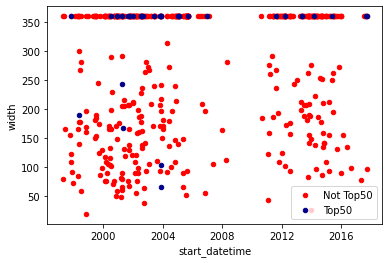

In [246]:
#I created two different scatter plots(I know it says one, but I just wanted to see what the other one would look like)
#This first one compares the width of the top50 solar flares, ranked based on the nasa data in comparison with the 
#flares that are not in the top50
n = new_nasa[(new_nasa['rank'].isnull()==True) & (new_nasa['width'].isnull() == False)].plot.scatter(x='start_datetime',
                      y='width',
                      c='Red', label = 'Not Top50')
#to make the scatterplot with observations not in the top 50 I took the new_nasa dataset, that I created with my function,
#and selected the values to be the ones that were not ranked and didn't have a np.nan width,
#then i positioned the width to be the y axis and the date to be the x axis, showing the evolution overtime, and also the
#the width comparison. Before doing this I didn't realize the lack of data from 2008-2010
correct_speed = correct_rank[correct_rank['width'].isnull() == False].plot.scatter(x='start_datetime',
                      y='width',
                      c='DarkBlue',label='Top50', ax=n)
#Then I graphed on the same graph, the values that had a rank, using the correct_rank dataframe that I created above

#When looking at the outcome, the majority of the width is at 360 for the Top50 elements, while for the Not Top50,
#there are also many at the 360 but also a lot spread out underneath

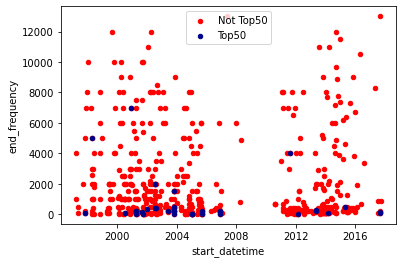

In [247]:
n = new_nasa[new_nasa['end_frequency'].isnull()==False].plot.scatter(x='start_datetime',
                      y='end_frequency',
                      c='Red',label = 'Not Top50' )
correct_speed = correct_rank[correct_rank['end_frequency'].isnull() == False].plot.scatter(x='start_datetime',
                      y='end_frequency',
                      c='DarkBlue',label='Top50', ax=n)